# Logistic Regression #

## Importing packages and data ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../datasets/telecom_churn_clean.csv", index_col = 0)
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Preparing data ##

### OneHot Encoding categorical variables ###

In [ ]:
df_dummies = pd.get_dummies(df[' Insert categorical variable '], drop_first = True).astype('int')
df = pd.concat([df, df_dummies], axis = 1)
df = df.drop(' Insert categorical variable ', axis = 1)

### Separating X and y ###

In [3]:
X = df.drop('churn', axis = 1).values
y = df['churn'].values

### Separating train and test samples ###

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

## One model ##

### Instantiating the model ###

In [5]:
logreg = LogisticRegression()

### Fitting the model ###

In [6]:
logreg.fit(X_train, y_train)

/Users/benjaminamsellem/Desktop/Code/VSCode/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluating the model ###

In [7]:
test_score = logreg.score(X_test, y_test)
print('Test Set Accuracy: {}'.format(test_score))

Test Set Accuracy: 0.8590704647676162


In [8]:
y_pred = logreg.predict(X_test)

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[565   4]
 [ 90   8]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.8488293166849412, 0.9896712189596483),
  ('0', '1'): (0.0,
   0.9929934780958608,
   0.8488293166849412,
   0.007006521904139052),
  ('1', '0'): (0.8538044410630508,
   0.0,
   0.1461955589369494,
   0.9153162926300088),
  ('1', '1'): (0.8538044410630508,
   0.9186385517662213,
   0.1461955589369494,
   0.08136144823377854)})

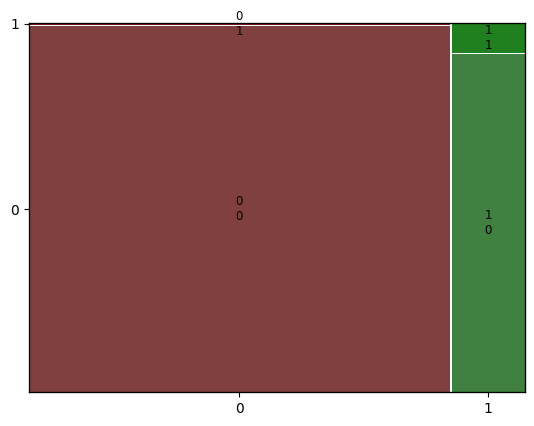

In [10]:
mosaic(conf_mat)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       569
           1       0.67      0.08      0.15        98

    accuracy                           0.86       667
   macro avg       0.76      0.54      0.53       667
weighted avg       0.83      0.86      0.81       667



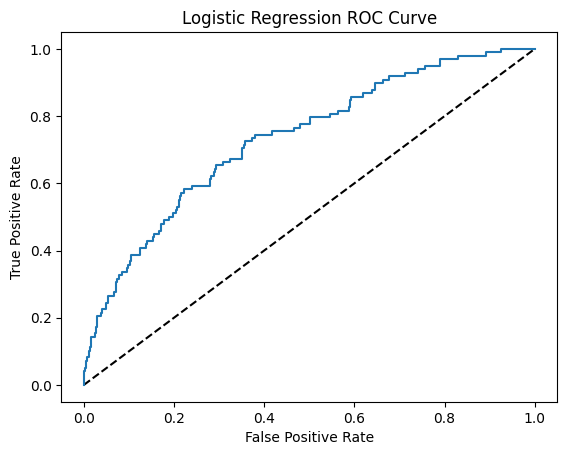

In [17]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
fpr ,tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [19]:
print(roc_auc_score(y_test, y_pred_probs))

0.7323087407194864
